# [CIVENG190] Notebook 4: Coastal Resilience

<br>

**Estimated Time:** ~60 minutes <br>
**Notebook Developed By:** Skye Pickett, Abigail Yu, Lori Khashaki, and Vishali Vallioor  <br>

Today we'll be exploring coastal resilience in the topic of flooding and how it affects different communities. Sea level is projected to increase, which may have the potential of affecting millions of individuals. Different impacts are studied through different data analysis techniques in this notebook, with a particular focus on coastal communities in the San Francisco Bay Area.

### Learning Outcomes

In this notebook, you will learn about:
* Data Pre-Processing/Cleaning
* One-Hot Encoding
* Developing a K-Nearest Neighbors Classification Algorithm
* Using kNN to Simulate Classification in Dr. Hummel's Paper
* Creating Visualizations for K-Nearest Neighbors
* Comparing Clustering Techniques
* Visual Prediction


### Table of Contents
1. [Introduction to the Data](#0) <br>
1. [Preparing the Data](#1) <br>
1. [Comparing Demographics to Sea Level Rise (SLR)](#2) <br>
1. [K-Nearest Neighbors](#3) <br>
1. [SLR vs. Number of Residents](#4) <br>
1. [Conclusion](#5) <br>
1. [Explore Data Science Opportunities](#6)<br>
1. [Feedback Form](#9)<br>

-------------------------------------------------------------------

In [10]:
import numpy as np
import pandas as pd
import folium
import ipywidgets as widgets
from IPython.display import display, HTML
import datascience
from sklearn.model_selection import train_test_split
from scipy.spatial import distance

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
print("All necessary packages have been imported!")

All necessary packages have been imported!


# 1. Introduction to the Data <a id='0'></a>

As mentioned in the notebook overview, we will be utilizing data analysis methods to explore the coastal resilience among communities in the San Francisco Bay Area. For further reading, feel free to check out the paper this notebook is based on: [*Clusters of community exposure to coastal flooding* by Dr. Hummel](https://drive.google.com/file/d/1i4Q5dswdnIRLlW63SnalzCULNAx0avYq/view?usp=sharing).

### 1.1 Introducing Our Topic

#### Dr. Hummel's Paper

Our notebook is heavily inspired by the methods and techniques outlined in Dr. Hummel's paper in our exploration of coastal resilience. The paper primarily centers its analysis on 63 jurisdictions in the San Francisco Bay Area, using demographic data and effectors to sea level rise and developing an effective statistical cluster analysis model. Cluster analysis proves to be effective, which we will see and demonstrate in today's notebook.

#### This analysis utilizes demographic data from citizens in these individual counties. What demographic variables do you think would be useful in our analysis?

***Replace this with your answer*** (double-click to edit)


### 1.2 The Dataset

The dataset we will be primarily using today is the same one used in Dr. Hummel's research. The dataset contains different rows detailing data on various communities' impact by rising sea levels. In the following cells, we will be able to see how this table looks and works, and how we can manipulate it by developing clusters to analyze further. Hummel's paper uses the [PAM Algorithm](https://en.wikibooks.org/wiki/Data_Mining_Algorithms_In_R/Clustering/Partitioning_Around_Medoids_(PAM)), and we will be using something similar to it known as the K-Nearest Neigbors classifier.

# 2. Preparing the Data <a id='1'></a>


Now we will be importing and seeing the traits and variables of our dataset.

### 2.1 Reading in the Data

Our dataset, titled "Bay Area Results", is from a US geological survey data release. In fact, here is an [interactive tool](https://www.usgs.gov/apps/hera/floodTool.php) based on the same dataset from the USGS. If you zoom into the San Francisco Bay Area and toggle settings on the left, you can see in blue the communities affected by coastal flooding. The primary purpose of the USGS is to study the natural resources and hazards of the United States.


The command `pd.read_csv` allows us to read and load our csv file and `.head()` gives us the first 5 rows of the dataset. Run the code cell below to load the data that we will be using for analysis.

In [11]:
# This cell will read in the necessary data sets. Run it and take a look at the dataframe / table below!
county_sea_levels = pd.read_csv('datasets/BayAreaResults.csv').drop(columns=['Unnamed: 44', 'Unnamed: 45', 'Group', 'Indicator', 'Code', 'Explanation']) # reads csv file and loads it
county_sea_levels.head()

,Geo_Order,OBJECTID,Community,County,Res_N_0,Res_N_50,Res_N_100,Res_N_150,Res_P_0,Res_P_50,...,FS_N_100,FS_N_150,SC_N_0,SC_N_50,SC_N_100,SC_N_150,MED_N_0,MED_N_50,MED_N_100,MED_N_150
0,34,1,Alameda,Alameda County,0,185,1706,9028,0.0,0.0,...,0,0,0,0,0,4,0,0,0,0
1,30,2,Albany,Alameda County,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,31,3,Berkeley,Alameda County,0,0,1,5,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,32,4,Emeryville,Alameda County,0,94,117,146,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,38,5,Fremont,Alameda County,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


**Let's take a look at what variables we have:**

In [12]:
county_sea_levels.columns.values

array(['Geo_Order', 'OBJECTID', 'Community', 'County', 'Res_N_0',
       'Res_N_50', 'Res_N_100', 'Res_N_150', 'Res_P_0', 'Res_P_50',
       'Res_P_100', 'Res_P_150', 'Emp_N_0', 'Emp_N_50', 'Emp_N_100',
       'Emp_N_150', 'Emp_P_0', 'Emp_P_50', 'Emp_P_100', 'Emp_P_150',
       'HW_L_0', 'HW_L_50', 'HW_L_100', 'HW_L_150', 'RR_L_0', 'RR_L_50',
       'RR_L_100', 'RR_L_150', 'PS_N_0', 'PS_N_50', 'PS_N_100', 'PS_N_150',
       'FS_N_0', 'FS_N_50', 'FS_N_100', 'FS_N_150', 'SC_N_0', 'SC_N_50',
       'SC_N_100', 'SC_N_150', 'MED_N_0', 'MED_N_50', 'MED_N_100',
       'MED_N_150'], dtype=object)

**For this notebook we will be primarly be working with these variables:** As you can see, the column "Res_N_50" would be the number of residents in a certain community with 50 cm of sea level rise. The column "Res_P_50" would represent the percent of residents in this community with 50 cm of sea level rise. Looking back at our dataset, this would mean that for Alameda, there were 185 residents experiencing 50 cm of sea level rise and 0.0% of residents experiencing 50 cm of sea level rise. We can attribute this low percentage to the high population in Alamenda County as a whole.

Variable | Description
----|----
Res_N_0 | Residents in zone with 0 SLR
Res_N_50  | Residents in zone with 50 SLR
Res_N_100 | Residents in zone with 100 SLR
Res_N_150 | Residents in zone with 150 SLR
Res_P_0 | Resident % in zone with 0 SLR
Res_P_50 | Resident % in zone with 50 SLR
Res_P_100 | Resident % in zone with 100 SLR
Res_P_150 | Resident % in zone with 150 SLR

*Note that SLR stands for Sea Level Rise!

> Our dataset, as you can see, contains a lot of 0.0/0 values and it may be useful to use data pre-processing here.

### 2.2 Cleaning the Data/EDA

**Let's see how many different counties there are and how many communities are in each county:**

In [13]:
counties = county_sea_levels.groupby('County').size().to_frame().rename(columns={0: "count"}).reset_index()
counties

,County,count
0,Alameda County,11
1,Contra Costa County,8
2,Marin County,10
3,Napa County,3
4,San Francisco County,1
5,San Mateo County,16
6,Santa Clara County,7
7,Solano County,5
8,Sonoma County,2


**Now we're going to display a bar chart of the communities per county.**

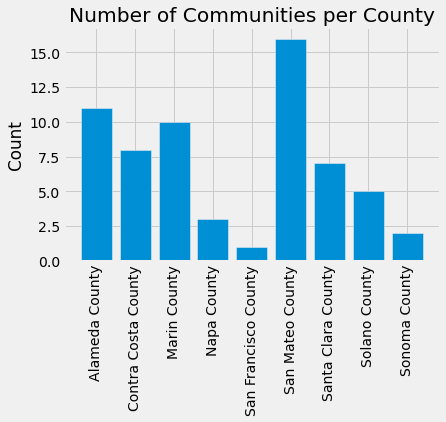

In [14]:
plt.bar(counties['County'], counties['count'])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Number of Communities per County'); 

**What county has the most communities?**

***Replace this with your answer*** (double-click to edit)

### 2.3 One-Hot Encoding

In some cases, it may be useful to one-hot encode our data. [One-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) is the process by which categorical variables are converted into numerical values to be used in ML/data analysis algorithms. Run through this quick walk-through of the process!

*Let's make our county variable numerical.* This is primarily done by using the [`df.get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) method provided by Pandas. This method takes in a DataFrame with a specific column indicated, and returns a DataFrame with that column's variables encoded. Run the following cell to see what this means!

In [15]:
pd.get_dummies(county_sea_levels["County"])

,Alameda County,Contra Costa County,Marin County,Napa County,San Francisco County,San Mateo County,Santa Clara County,Solano County,Sonoma County
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
58,0,0,0,0,0,0,0,1,0
59,0,0,0,0,0,0,0,1,0
60,0,0,0,0,0,0,0,1,0
61,0,0,0,0,0,0,0,0,1


Take a look at the first row. This zone is within Alameda County. `pd.get_dummies` encodes the value under "Alameda County" with a 1 and encodes values under every other county with 0, as each zone can only be in one county. The process is the same with all rows:
> **1** in the column labelled with the county that the zone belongs to and **0** in every other column.

Notice how all of these rows and columns were created from just a singular column containing categorical data within our original table. Once we get this DataFrame, we would add these columns as new features to our original DataFrame!

**Think of and describe a scenario (related to or not related to our topic) where using one-hot encoding may be helpful.**

***Replace this with your answer*** (double-click to edit)

**Why is data cleaning and pre-processing helpful prior to data analysis?**

***Replace this with your answer*** (double-click to edit)

# 3. Comparing Demographics to Sea Level Rise (SLR) <a id='2'></a>

### 3.1 Demographic Data

Let's import the dataset. This was a part of the exact same research as our `county_sea_levels` DataFrame, but is stored in a different *csv* file, so we will import it below. Begin to pay more attention to these import statements, as in the next notebook in a couple weeks, you will be asked to import data similarly. Since this data is about the demographic information of each zone, we will assign the DataFrame to a variable called `demographics`.

In [16]:
demographics = pd.read_csv('datasets/demographics.csv').drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'])
demographics.head() #.head() shows the first 5 rows of the data

,Geo_Order,OBJECTID,Community,County,HISP_P,White_P,Black_P,AI_P,Asian_P,PI_P,Other_P,Under5_P,Over65_P,Inst_P,NonInst_P,Renters_P
0,34,1,Alameda,Alameda County,0.11,0.6,0.08,0.02,0.34,0.01,0.04,0.04,0.12,0.0,0.03,0.60
1,30,2,Albany,Alameda County,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2,31,3,Berkeley,Alameda County,0.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
3,32,4,Emeryville,Alameda County,0.04,0.7,0.07,0.01,0.24,0.00,0.02,0.02,0.23,0.0,0.00,0.46
4,38,5,Fremont,Alameda County,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00


As with any data, let's review the variables so we are sure we understand what the data represents. Run the below cell to print a list of the column/variable names.

In [17]:
list(demographics.columns)

['Geo_Order',
 'OBJECTID',
 'Community',
 'County',
 'HISP_P',
 'White_P',
 'Black_P',
 'AI_P',
 'Asian_P',
 'PI_P',
 'Other_P',
 'Under5_P',
 'Over65_P',
 'Inst_P',
 'NonInst_P',
 'Renters_P']

We will be focusing on the columns that represent the populations of each race:
> `White_P`, `Black_P`, `AI_P`, `Asian_P`, `PI_P`, `Other_P`

For example, `White_P` will contain a number between 0 and 1 that represents the proportion of white people that are residents in that zone (0.62 means 62% of the residents in this zone are white).

### 3.2 Merging DataFrames

As mentioned in the title of this section, we want to compare the demographic information found in `demographics` to Sea Level Rise information. Remember, the data about Sea Level Rise was stored in the `county_sea_levels` DataFrame.
> To merge two DataFrames, we use **`pd.merge`**. In order to merge, the two DataFrames need one (or more) column with identical values. In this case, the `Geo_Order`, `OBJECTID`, `Community`, and `County` columns are all identical so these two DataFrames will merge seamlessly (without any NA values produced). [More information about pd.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [18]:
slr_and_demo = pd.merge(county_sea_levels, demographics)
slr_and_demo

,Geo_Order,OBJECTID,Community,County,Res_N_0,Res_N_50,Res_N_100,Res_N_150,Res_P_0,Res_P_50,...,Black_P,AI_P,Asian_P,PI_P,Other_P,Under5_P,Over65_P,Inst_P,NonInst_P,Renters_P
0,34,1,Alameda,Alameda County,0,185,1706,9028,0.0,0.0,...,0.08,0.02,0.34,0.01,0.04,0.04,0.12,0.0,0.03,0.60
1,30,2,Albany,Alameda County,0,0,0,0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2,31,3,Berkeley,Alameda County,0,0,1,5,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
3,32,4,Emeryville,Alameda County,0,94,117,146,0.0,0.0,...,0.07,0.01,0.24,0.00,0.02,0.02,0.23,0.0,0.00,0.46
4,38,5,Fremont,Alameda County,0,0,0,0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,19,59,Suisun City,Solano County,0,12,33,1872,0.0,0.0,...,0.27,0.00,0.09,0.00,0.09,0.00,0.09,0.0,0.00,0.33
59,20,60,Unincorporated Solano County,Solano County,0,63,91,110,0.0,0.0,...,0.00,0.04,0.09,0.01,0.03,0.03,0.24,0.0,0.00,0.48
60,16,61,Vallejo,Solano County,0,124,538,596,0.0,0.0,...,0.18,0.00,0.29,0.01,0.09,0.03,0.12,0.0,0.08,0.16
61,11,62,Petaluma,Sonoma County,0,76,297,315,0.0,0.0,...,0.01,0.01,0.10,0.00,0.10,0.08,0.04,0.0,0.04,0.77


Notice that above this cell, it says "63 rows x 56 columns". These are the dimensions of the new DataFrame that we assigned to the variable `slr_and_demo`. We can find the same information about any DataFrame using the function `.shape`.

As a sanity check, let's view the shape of both DataFrames in addition to the new merged DataFrame.

In [19]:
county_sea_levels.shape

(63, 44)

In [20]:
demographics.shape

(63, 16)

In [21]:
slr_and_demo.shape

(63, 56)

**Notice that the number of rows is the same in all 3 DataFrames (63 rows). Now notice that `county_sea_levels` has 44 columns and `demographics` has 16 columns. 44 + 16 = 60 but `slr_and_demo` has only 56 columns. Why is this?**

*Hint: Re-read the description of how `pd.merge` works.*

***Replace this with your answer*** (double-click to edit)

## 3.3 Graphing Racial Demographics vs. SLR

Now we have one DataFrame (`slr_and_demo`) that contains all the data we need to compare racial demographics with Sea Level Rise. As we saw before, there are columns representing proportions of different races living in each zone. While we can compare any specific race with the sea level rise present, we will generalize our analysis a bit by comparing the percentage of people of color (POC) residing in the zone with the amount of sea level rise in the zone.

Since there isn't a column that represents the total proportion of POC residents, we will make one!
> Proportions always add up to 1 (ie, each value in a single row under a column in the form of race_P summed together = 1). Knowing this fact, we can find the proportion of POC in the zone by subtracting `White_P` (proportion of white people in the zone) from 1. This is equivalent to summing together every race column that is doesn't represent white people.

> We then multiply this value by 100 to turn it into a percentage (0 to 100) rather than a proportion (0 to 1) for readability in future graphs.

In [22]:
slr_and_demo['POC Percentage'] = (1-slr_and_demo['White_P'])*100

In [23]:
slr_and_demo.head()
#Scroll to the right to see our new column called 'POC Percentage'

,Geo_Order,OBJECTID,Community,County,Res_N_0,Res_N_50,Res_N_100,Res_N_150,Res_P_0,Res_P_50,...,AI_P,Asian_P,PI_P,Other_P,Under5_P,Over65_P,Inst_P,NonInst_P,Renters_P,POC Percentage
0,34,1,Alameda,Alameda County,0,185,1706,9028,0.0,0.0,...,0.02,0.34,0.01,0.04,0.04,0.12,0.0,0.03,0.60,40.0
1,30,2,Albany,Alameda County,0,0,0,0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,100.0
2,31,3,Berkeley,Alameda County,0,0,1,5,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
3,32,4,Emeryville,Alameda County,0,94,117,146,0.0,0.0,...,0.01,0.24,0.00,0.02,0.02,0.23,0.0,0.00,0.46,30.0
4,38,5,Fremont,Alameda County,0,0,0,0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,100.0


We will use the package, ***Seaborn***, to plot a scatterplot ([`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)) with `POC Percentage` on the x-axis and `Res_P_150` turned into a percentage (aka multiplied by 100) on the y-axis.

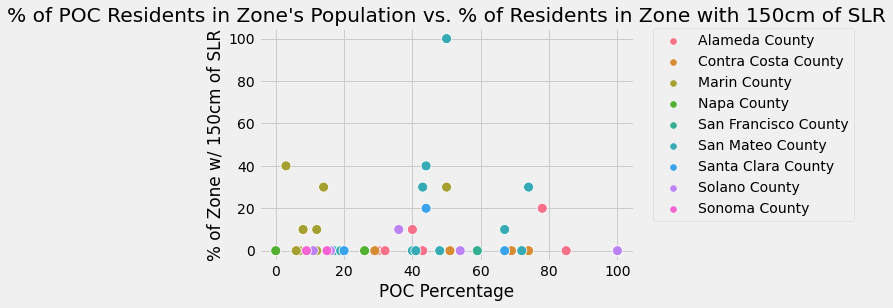

In [24]:
slr_and_demo['% of Zone w/ 150cm of SLR'] = slr_and_demo['Res_P_150']*100
sns.scatterplot(x='POC Percentage', y='% of Zone w/ 150cm of SLR', data=slr_and_demo, hue='County', s = 100) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0); #moves legend to the right
plt.title("% of POC Residents in Zone's Population vs. % of Residents in Zone with 150cm of SLR");

This can be a bit difficult to understand as there are many points clustered together and the outlier around (50, 100) makes the scale larger. We can change what portion of the x or y axis is shown using `plt.ylim` and `plt.xlim`. *This doesn't change our DataFrames, only the visualization.*
> We will use `plt.ylim(-1, 45)` meaning we want to be able to view the y-axis from y=-1 to y=45.

Always keep in mind the data we aren't visualizing, the outlier seen in the previous graph. We also changed the figure size for readability.

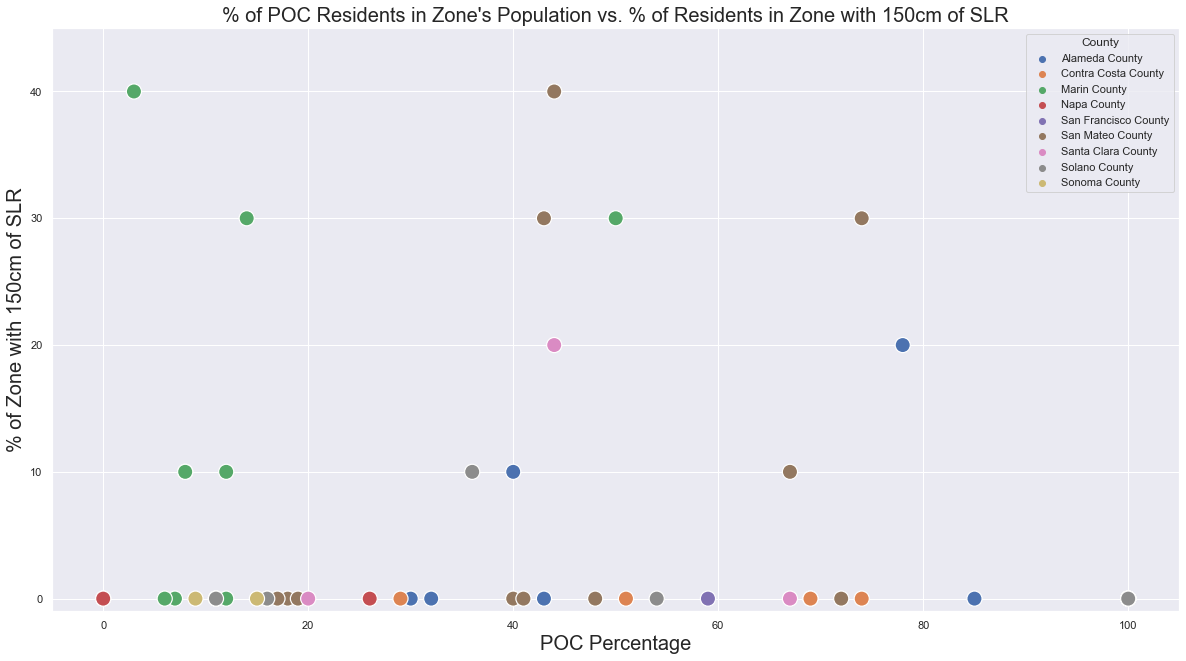

In [25]:
sns.set(rc = {'figure.figsize':(18,10)})
close_scatterplot = sns.scatterplot(x='POC Percentage', y='% of Zone w/ 150cm of SLR', data=slr_and_demo, hue='County', s = 230) 
close_scatterplot.axes.set_title("% of POC Residents in Zone's Population vs. % of Residents in Zone with 150cm of SLR",fontsize=20)
close_scatterplot.set_xlabel("POC Percentage", fontsize = 20)
close_scatterplot.set_ylabel("% of Zone with 150cm of SLR", fontsize = 20)
plt.ylim(-1, 45);

**Make observations about the scatterplot.**

*(1) Look at all points for general observations.
(2) Look at one color at a time (one county) and make observations about specific counties.*

***Replace this with your answer*** (double-click to edit)

**Make hypotheses about your observations are true in the context of our collected data.**

*Feel free to make Google searches about the counties you wrote about. Viewing their locations on a map may be helpful depending on what you observed in the last question.*

***Replace this with your answer*** (double-click to edit)

# 4. K-Nearest Neighbors <a id='3'></a>

Now, let's turn back to the `county_sea_levels` data and begin analyzing using an algorithm called **K-Nearest Neighbors**.

### 4.1 What is K-Nearest Neighbors?
**K-nearest neighbors (kNN) is a supervised (i.e. performed on _labeled_ datasets) machine learning algorithm mainly used for classification predictive problems, but it can be used for regression predictive problems as well!**

kNN uses **_feature similarity_** between new data (test set) and already available data (training set) to predict the values of the new data and assign them a category, based on how closely they match the training set.

We can break it down into the following steps.

**To classify a test set datapoint:**
1. Find its _k_ nearest neighbors:
    1. Find the distance between the test datapoint and each datapoint in the training set – Euclidean distance is most commonly used.
    2. Augment the training data table with a column containing all the distances.
    3. Based on distances, sort the augmented table in ascending order.
    4. Take the top _k_ rows of the sorted table.
2. Take a majority vote of the k nearest neighbors to see which of the two classes appears more often.
3. Assign the point to the class that appears most frequently.

The k-nearest neighbors algorithm is **powerful!** It doesn't assume anything about the underlying data being analyzed (also known as a _non-parametric algorithm_) as well as not learning from the training set immediately; instead, it stores the dataset and only performs an action on the dataset at the time of classification (also known as a _lazy learning algorithm_).

Here is a good resource to read more about k-nearest neighbors:
> [Data 8 textbook chapter for kNN](https://inferentialthinking.com/chapters/17/1/Nearest_Neighbors.html)

### 4.2 Example of K-Nearest Neighbors

Here's a simple example of a scenario that using k-nearest neighbors is helpful for classification:
> Suppose we're given a picture of a flower but we're not sure if it's a rose or a carnation – let's find out! Using kNN, we can find **similar features** of the new data in the picture to previous data of roses and carnations. For features, we can use number of petals, color, and size, for example. Then, based on the most similar features, our model will classify it either as a rose or a carnation.

For the following example, we will be trying to classify whether students attend UC Berkeley or Stanford depending on where they live! 

We've included the .csv file called `coordinates.csv` that has the latitude/longitude values and the school each student attends.  


In [26]:
coordinates = pd.read_csv('datasets/coordinates.csv')
coordinates

,latitude,longitude,school
0,37.869304,-122.254946,Berkeley
1,37.865051,-122.255582,Berkeley
2,37.866116,-122.253733,Berkeley
3,37.868049,-122.259579,Berkeley
4,37.868286,-122.256581,Berkeley
...,...,...,...
95,37.465370,-122.197002,Stanford
96,37.399869,-122.090946,Stanford
97,37.367410,-121.977035,Stanford
98,37.426077,-121.903974,Stanford


**Let's use Seaborn to visualize our data!** 

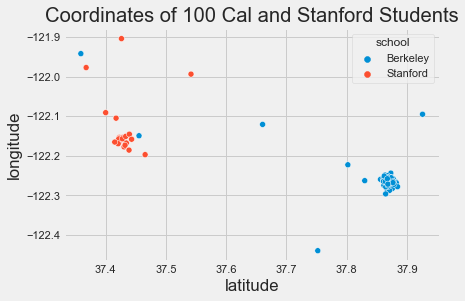

In [27]:
%matplotlib inline
plt.style.use('fivethirtyeight') #reseting the size of the figure 
sns.scatterplot(x = 'latitude', y = 'longitude', data = coordinates, hue='school')
plt.title('Coordinates of 100 Cal and Stanford Students');

**What observations can you gather?**

***Replace this with your answer*** (double-click to edit)

First, let's split our dataset into a training and a test set. There are 100 rows in our dataset, so let's use the 75 rows for training and 25 for testing. 

In [28]:
train, test = train_test_split(coordinates, test_size=0.25, random_state = 42)

**Now that we split our data, let's begin classifying the test data using a kNN algorithm!**

In [29]:
def classify(test_row, k, train):
    # Creating a list to keep all the distances between each point
    distances = list()
    
    # Calculating the distances
    for train_row in train[['latitude', 'longitude']].values:
        test_row_features = test_row[[0, 1]]
        row_distances = distance.euclidean(train_row, test_row_features)
        distances.append(row_distances)
    training_copy = train.copy()
    training_copy['Distances'] = distances 
    
    # Finding the points that are closest 
    training_copy = training_copy.sort_values('Distances', ascending = True)[:k]
    
    # Returning the most popular class that appears
    most_popular_school = training_copy.groupby('school', as_index = False).count()['school'].mode()[0]
    return most_popular_school 

# For the first datapoint in the testing set, we predicting that the student went to Berkeley
example_point = classify(test.values[0], 3, train)
example_point

'Stanford'

Let's apply this function to every row in our dataset!

In [30]:
predicted_values = list();
for test_row in test.values:
    predicted_class = classify(test_row, 3, train)
    predicted_values.append(predicted_class)
test['predicted school'] = predicted_values
test.head()
# Ignore if a warning message comes up, it still produced the column we want - scroll down to see it

/var/folders/t4/cy821_y16vq_lg1gqv6hmg9r0000gn/T/ipykernel_19748/917862430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted school'] = predicted_values


,latitude,longitude,school,predicted school
83,37.434160,-122.167623,Stanford,Stanford
53,37.868927,-122.277466,Berkeley,Berkeley
70,37.868516,-122.271434,Berkeley,Berkeley
45,37.867164,-122.264062,Berkeley,Berkeley
44,37.884563,-122.277913,Berkeley,Berkeley


For the final step, lets calculate how acurate our kNN prediction is!

In [31]:
labels_correct = sum(test['predicted school'] == test['school'])
percentage_correct = labels_correct / len(test) * 100
percentage_correct

96.0

**Using this kNN algorithm we acheived a 96% accuracy on the test set!**

Since we have a 96% accuracy on our test set, we know that 96% of these 25 students were accurately labeled.


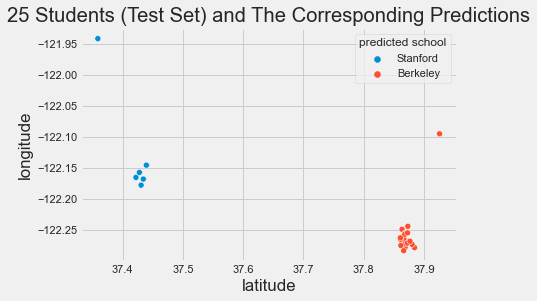

In [32]:
sns.scatterplot(x = 'latitude', y = 'longitude', data = test, hue='predicted school')
plt.title('25 Students (Test Set) and The Corresponding Predictions');
print("Since we have a 96% accuracy on our test set, we know that 96% of these 25 students were accurately labeled.")

If you're interested in a more specific walkthrough of k-nearest neighbors using a _movie recommendations dataset_, take a look at this [article](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)! The data in the article is available in our directory under `datasets/movies_recommendation_data.csv`, feel free to import and play around with it.

### 4.3 K-Nearest Neighbors on *our* Data

Dr. Hummel's paper outlines her study that "uses statistical cluster analysis to identify similarities in community exposure to flooding hazards for a suite of sea level rise and storm scenarios." kNN is a type of statistical cluster analysis, so we will test it out on our data.

Let's perform k-nearest neighbors on our coastal resilience dataset!

Remember, we're working with the `county_sea_levels` table. Let's take a look at it again:

In [33]:
county_sea_levels.head() #.head() shows first 5 rows

,Geo_Order,OBJECTID,Community,County,Res_N_0,Res_N_50,Res_N_100,Res_N_150,Res_P_0,Res_P_50,...,FS_N_100,FS_N_150,SC_N_0,SC_N_50,SC_N_100,SC_N_150,MED_N_0,MED_N_50,MED_N_100,MED_N_150
0,34,1,Alameda,Alameda County,0,185,1706,9028,0.0,0.0,...,0,0,0,0,0,4,0,0,0,0
1,30,2,Albany,Alameda County,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,31,3,Berkeley,Alameda County,0,0,1,5,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,32,4,Emeryville,Alameda County,0,94,117,146,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,38,5,Fremont,Alameda County,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Splitting the dataset
Next, we'll want to split up the dataset. We're going to do 2 different kinds of things with it:
1. We'll build a classifier using qualities we know for the associated label; this will teach it to recognize labels of similar given values. This process is known as *training*.
2. We'll evaluate or *test* the accuracy of the classifier we build on data we haven't seen before.

We want to use separate datasets for these two purposes to avoid _overfitting_, which is where a machine learning model fits its training data too well and fails to reliably fit additional new/unseen data.

We'll use the sklearn function `train_test_split` to do this: it splits arrays or matrices into random train and test subsets. Read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [34]:
county_train, county_test = train_test_split(county_sea_levels, test_size=0.2, random_state = 42)

In [35]:
print("Number of rows and columns of training set: ", county_train.shape)
print("Number of rows and columns of test set: ", county_test.shape)

Number of rows and columns of training set:  (50, 44)
Number of rows and columns of test set:  (13, 44)


**Why do we divide our data into a training and test set? What is the point of a test set, and why do we only want to use the test set once?**

***Replace this with your answer*** (double-click to edit)

Now that we split our data, let's begin classifying the test data! We're using the same kNN algorithm that we used above for the Berkeley/Stanford dataset. Instead of latitude and longitude, we're using the number of residents in a certain community that has 150 cm of SLR and the GeoOrder to predict what county the zone is in.

Let's define a classification function, just like in the Stanford/Berkeley example, but for the `county_sea_levels` dataset.

In [36]:
def classify(test_row, k, train):
    # Creating a list to keep all the distances between each point
    distances = list()
    
    # Calculating the distances
    for train_row in train[['Geo_Order', 'Res_N_150']].values:
        test_row_features = test_row[[0, 1]]
        row_distances = distance.euclidean(train_row, test_row_features)
        distances.append(row_distances)
    training_copy = train.copy()
    training_copy['Distances'] = distances 
    
    # Finding the points that are closest 
    training_copy = training_copy.sort_values('Distances', ascending = True)[:k]
    
    # Returning the most popular category (county) of the close points  
    most_popular_county = training_copy.groupby('County', as_index = False).count()['County'].mode()[0]
    return most_popular_county 

# For the first datapoint in the testing set, we predict that the zone is in Alameda County
county_first_point = classify(county_sea_levels.values[0], 3, county_train) # pick k = 3
county_first_point

'Alameda County'

**Generally, we pick an odd-numbered `k` in k-NN. Why do you think that is?**

***Replace this with your answer*** (double-click to edit)

Now, let's run our 3-nearest neighbors classifier function on each row in the test set. We can append each result to the empty list `predicted_counties` and add it to the end of the `county_test` dataframe to see the results.

*Note: Usually before using a classifier on a test set, we'd classify first on a "validation" set. Then, we can modify our model parameters again if need be, before actually testing on the test set. You don’t need to do that for this question, but keep it in mind!*

In [37]:
predicted_counties = list()

for test_row in county_test.values:
    predicted_county = classify(test_row, 3, county_train)
    predicted_counties.append(predicted_county)

county_test['Predicted County'] = predicted_counties 
county_test.head()

# Ignore any warning message

/var/folders/t4/cy821_y16vq_lg1gqv6hmg9r0000gn/T/ipykernel_19748/1120645293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_test['Predicted County'] = predicted_counties


,Geo_Order,OBJECTID,Community,County,Res_N_0,Res_N_50,Res_N_100,Res_N_150,Res_P_0,Res_P_50,...,FS_N_150,SC_N_0,SC_N_50,SC_N_100,SC_N_150,MED_N_0,MED_N_50,MED_N_100,MED_N_150,Predicted County
61,11,62,Petaluma,Sonoma County,0,76,297,315,0.0,0.0,...,0,0,0,1,1,0,0,0,0,Contra Costa County
57,18,58,Fairfield,Solano County,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Contra Costa County
0,34,1,Alameda,Alameda County,0,185,1706,9028,0.0,0.0,...,0,0,0,0,4,0,0,0,0,Alameda County
43,51,44,Redwood City,San Mateo County,0,12007,14461,20057,0.0,0.2,...,3,0,4,4,6,0,2,2,8,San Mateo County
5,36,6,Hayward,Alameda County,0,969,1173,2658,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Alameda County


### 4.4 Accuracy

Finally, let's see how accurate our classifier was! Accuracy is a proportion of the counties that were correctly predicted, so let's find the number of counties where the `Predicted County` matched the actual `County` and divide that by the number of rows in the test set.

In [38]:
labels_correct = sum(county_test['Predicted County'] == county_test['County'])
accuracy = labels_correct / len(county_test)
accuracy

0.5384615384615384

Using this kNN algorithm we acheived a 54% accuracy on the test set.

Since we have a 54% accuracy on our test set, we know that 54% of these zones were accurately labeled.


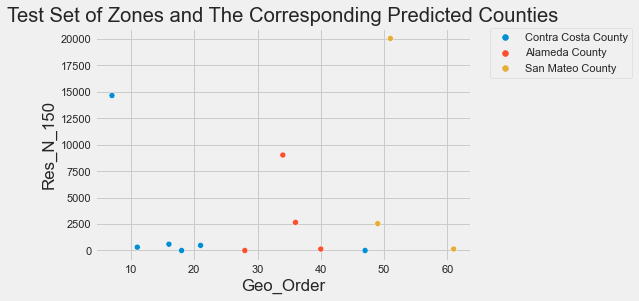

In [39]:
sns.scatterplot(x = 'Geo_Order', y = 'Res_N_150', data = county_test, hue= 'Predicted County')
plt.title('Test Set of Zones and The Corresponding Predicted Counties');
print("Since we have a 54% accuracy on our test set, we know that 54% of these zones were accurately labeled.")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0); #moves legend to the right

To compare...

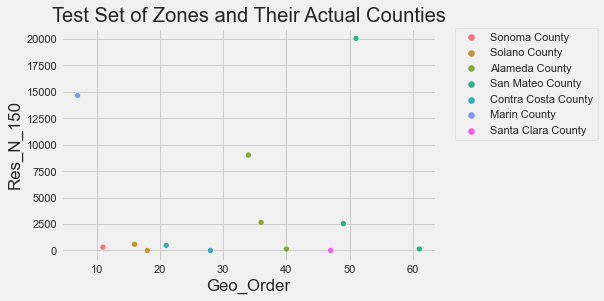

In [40]:
sns.scatterplot(x = 'Geo_Order', y = 'Res_N_150', data = county_test, hue= 'County');
plt.title('Test Set of Zones and Their Actual Counties');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0); #moves legend to the right


## 4.5 kNN vs. PAM Algorithm

As I'm sure you noticed, 54% is a pretty low classification accuracy. The kNN algorithm classified a bit over half of our test set correctly. 

In Dr. Hummel's paper, they used the [PAM Algorithm](https://en.wikibooks.org/wiki/Data_Mining_Algorithms_In_R/Clustering/Partitioning_Around_Medoids_(PAM)) and analyzed a combination of all the variables collected. **kNN doesn't allow us to use more than two variables for prediction and they must also be numerical.** We used kNN to show how cluster analysis works in a simpler method; an example that still predicts reasonably well, but not accurately enough to be reliable. 

Dr. Hummel discusses his methods in his paper:

> "Understanding a community’s vulnerability to climate-driven hazards can be a complex undertaking, but a common first step to support more in-depth analyses is an estimation of its hazard exposure and sensitivity based on the **integration of hazard scenarios with infrastructure and socioeconomic data** (e.g., Frazier et al. 2010; Wu et al. 2002; Strauss et al. 2012; Schweikert et al. 2015; Abdollahian et al. 2016; Paprotny and Terefenko 2017). The relative vulnerability of multiple communities then can be characterized using comparative metrics, such as indices based on principal component analysis (e.g., Cutter et al. 2003; Wood et al. 2010; Nelson et al. 2010). Although useful for discussing vulnerability across a region, single numerical indices have limited utility for partnership development since results may focus attention only on highly ranked jurisdictions, as well as overlook the factors that create vulnerability and their interrelationships (Sharma and Patwardhan 2008). Additionally, **single metric rankings may miss similarities that communities share if they are not wholly similar.** Other quantitative methods, such as cluster analysis, can be used to identify groupings of communities based on similar vulnerability characteristics (e.g., Wood et al. 2015) and may therefore be better suited for identifying potential partners in climate-change adaptation."
… 

>"**Geospatial data summarizing various population, business, and infrastructure indicators were used to estimate community exposure to a given hazard zone in Jones et al. (2016).** Residential populations were estimated using block-level population counts compiled for the 2010 US Census (U.S. Census Bureau 2010). Demographic factors, such as age, ethnicity, and tenancy, can amplify an individual’s sensitivity to hazards (Morrow 1999; Fothergill et al. 1999; Burby et al. 2003; Wood et al. 2012); therefore, the 2010 block-level data were used to estimate demographic attributes related to these socio-economic indicators of sensitivity, including ethnicity (Hispanic or Latino), non-White race (American Indian and Alaska Native, Asian, Black or African-American, Native Hawaiian and other Pacific Islander), age (individuals less than 5 and more than 65 years in age), tenancy (renter-occupied households), and group quarters (institutionalized, such as correctional facilities or nursing homes, and non-institutionalized, such as dormitories or military barracks)."

**What are some differences between the ways we classified counties and the ways Dr. Hummel classified communities?**

***Replace this with your answer*** (double-click to edit)

# 5. SLR vs. Number of Residents <a id='4'></a>


### 5.1 Preparing the DataFrame

Recall the variables of the `county_sea_levels` DataFrame.

In [41]:
county_sea_levels.columns.values

array(['Geo_Order', 'OBJECTID', 'Community', 'County', 'Res_N_0',
       'Res_N_50', 'Res_N_100', 'Res_N_150', 'Res_P_0', 'Res_P_50',
       'Res_P_100', 'Res_P_150', 'Emp_N_0', 'Emp_N_50', 'Emp_N_100',
       'Emp_N_150', 'Emp_P_0', 'Emp_P_50', 'Emp_P_100', 'Emp_P_150',
       'HW_L_0', 'HW_L_50', 'HW_L_100', 'HW_L_150', 'RR_L_0', 'RR_L_50',
       'RR_L_100', 'RR_L_150', 'PS_N_0', 'PS_N_50', 'PS_N_100', 'PS_N_150',
       'FS_N_0', 'FS_N_50', 'FS_N_100', 'FS_N_150', 'SC_N_0', 'SC_N_50',
       'SC_N_100', 'SC_N_150', 'MED_N_0', 'MED_N_50', 'MED_N_100',
       'MED_N_150'], dtype=object)

Unfortunately for us, none of these columns represent the total residents in the zone. We will make one! This is done by adding the number of residents that fall into each SLR category.

In [42]:
slr_and_demo['Total Residents'] = slr_and_demo['Res_N_0']+slr_and_demo['Res_N_50']+slr_and_demo['Res_N_100']+ slr_and_demo['Res_N_150']

### 5.2 Visualizing with `sns.lineplot`

Now let's use `sns.lineplot` to plot the Number of Residents in the zone with __ cm of SLR vs. the Total Number of Residents in the Zone. The legend in graph indicates which color line represents which level of SLR.

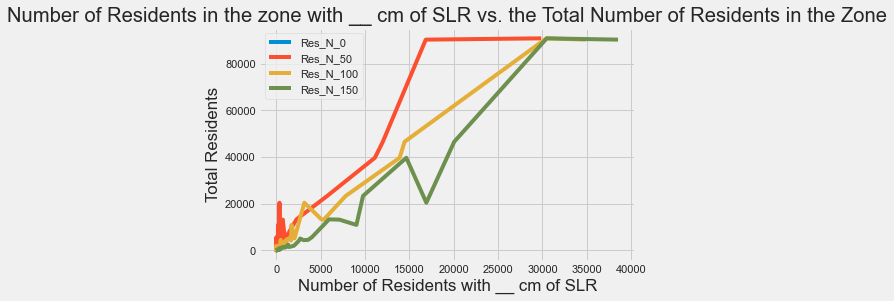

In [43]:
sns.lineplot(x= 'Res_N_0', y = 'Total Residents', data = slr_and_demo, label = 'Res_N_0')
sns.lineplot(x= 'Res_N_50', y = 'Total Residents',data = slr_and_demo, label = 'Res_N_50')
sns.lineplot(x= 'Res_N_100', y = 'Total Residents',data = slr_and_demo, label = 'Res_N_100')
sns.lineplot(x= 'Res_N_150', y = 'Total Residents', data = slr_and_demo, label = 'Res_N_150')
plt.xlabel("Number of Residents with __ cm of SLR")
plt.title("Number of Residents in the zone with __ cm of SLR vs. the Total Number of Residents in the Zone")
label = 'Res_N_0';

**Make observations about this lineplot.**

***Replace this with your answer*** (double-click to edit)

### 5.3 Practicing Prediction

**Make a descriptive prediction about where a line would fall for Res_N_200. Give some example points that would be on your Res_N_200 line.**

***Replace this with your answer*** (double-click to edit)

# 6. Conclusion  <a id='5'></a>


In this notebook you learned:
* Data Pre-Processing/Cleaning
* One-Hot Encoding
* Developing a K-Nearest Neighbors Classification Algorithm
* Using kNN to Simulate Classification in Dr. Hummel's Paper
* Creating Visualizations for K-Nearest Neighbors
* Comparing Clustering Techniques
* Visual Prediction

**Based on what you've learned in this notebook, are there strong spatial or demographic inequities in coastal sea-level rise along Bay Area coastlines?**

***Replace this with your answer*** (double-click to edit)

<br>

### Congratulations on completing the notebook!


# 7. Explore Data Science Opportunities  <a id='6'></a>

Interested in learning more about how to get involved in data science or learn about data science applications in Civil Engineering? The following resources might help support your learning:

---

- Data Science Modules: http://data.berkeley.edu/education/modules

- Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings
- Data Science for Smart Cities (CIVENG 88); offered in Spring 2023, 2 units: https://classes.berkeley.edu/content/2023-spring-civeng-c88-001-lec-001

- Data 8 Course Information: http://data8.org/

- Data 100 Course Information: https://ds100.org/



# 8. Feedback Form <a id='7'></a>

<div class="alert alert-info">
<b> We encourage students to fill out the following feedback form to share your experience with this Module notebook. This feedback form will take no longer than 5 minutes. At UC Berkeley Data Science Undergraduate Studies Modules, we appreciate all feedback to improve the learning of students and experience utilizing Jupyter Notebooks for Data Science Education: </b> 
</div>

## [UC Berkeley Data Science Feedback Form](https://forms.gle/hipxf2uFw5Ud4Hyn8)